# Data Analysis Project: Bike Sharing Datasets

- **Nama:** Faris Munir Mahdi
- **Email:** 21081010064@student.upnjatim.ac.id

### Defining Business Questions

1. What factors contribute to the number of bike rentals, and how do they impact rental rates?
2. Based on demand patterns, when is the optimal time to increase the number of bikes?

### Data Wrangling

In [26]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### Gathering Data

1. Load the data

In [7]:
hourly_data = pd.read_csv("data/hour.csv")
daily_data = pd.read_csv("data/day.csv")

2. Brief preprocessing before merging

In [9]:
hourly_data['dteday'] = pd.to_datetime(hourly_data['dteday'])
daily_data['dteday'] = pd.to_datetime(daily_data['dteday'])

In [10]:
print(hourly_data.columns)
print(daily_data.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


3. Add a column for day names (e.g., "Monday")

In [11]:
hourly_data['day_name'] = hourly_data['dteday'].dt.day_name()
daily_data['day_name'] = daily_data['dteday'].dt.day_name()

In [12]:
hourly_data['year_month'] = hourly_data['dteday'].dt.to_period('M')
daily_data['year_month'] = daily_data['dteday'].dt.to_period('M')

In [14]:
print("Hourly Data (First 5 Rows):")
print(hourly_data.head())

print("\nDaily Data (First 5 Rows):")
print(daily_data.head())

Hourly Data (First 5 Rows):
   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

   day_name year_month  
0  Saturday    2011-01  
1  Saturday    2011-

4. Save the processed dataframe into a new variable.

In [15]:
hourly_data_gathered = hourly_data
daily_data_gathered = daily_data

**Insight**:

- **Two Levels of Data Granularity**:
The dataset provides information at two levels of granularity: hourly details and daily aggregates. The presence of these two datasets allows for the exploration of bike rental patterns on different time scales, enabling the identification of both daily trends and intra-day fluctuations.

- **Accurate Date Representation**:
The dteday column in both datasets has been converted to the datetime data type. This conversion is crucial for time series analysis, ensuring that time-based operations and groupings can be performed accurately.

- **Temporal Feature Extraction**:
The day_name (day of the week) and year_month (year-month) columns are derived from the dteday column. These additional features enrich the dataset and enable trend analysis based on weekdays, as well as seasonal and yearly variations.

- **Daily Data as an Aggregate**:
The daily dataset (day.csv) is inherently an aggregation of the hourly dataset (hour.csv). Therefore, merging the two datasets is unnecessary and may introduce redundancy. Analysis can be conducted independently on each dataset, depending on the required level of granularity.

#### Assessing Data

1. Check missing values

In [16]:
print("Missing values in hourly_data:")
print(hourly_data.isnull().sum())

print("\nMissing values in daily_data:")
print(daily_data.isnull().sum())

Missing values in hourly_data:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day_name      0
year_month    0
dtype: int64

Missing values in daily_data:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day_name      0
year_month    0
dtype: int64


2. Check data types

In [17]:
print("Data types of hourly_data:")
print(hourly_data.dtypes)

print("\nData types of daily_data:")
print(daily_data.dtypes)

Data types of hourly_data:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
day_name              object
year_month         period[M]
dtype: object

Data types of daily_data:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casu

3. Check inconsistent values

In [18]:
print("Unique values in hourly_data:")
for col in ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']:
    print(f"{col}: {hourly_data[col].unique()}")

print("\nUnique values in daily_data:")
for col in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']: #No 'hr'
   print(f"{col}: {daily_data[col].unique()}")

Unique values in hourly_data:
season: [1 2 3 4]
yr: [0 1]
mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
hr: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
holiday: [0 1]
weekday: [6 0 1 2 3 4 5]
workingday: [0 1]
weathersit: [1 2 3 4]

Unique values in daily_data:
season: [1 2 3 4]
yr: [0 1]
mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday: [0 1]
weekday: [6 0 1 2 3 4 5]
workingday: [0 1]
weathersit: [2 1 3]


In [19]:
print("Minimum values in hourly_data (casual, registered, cnt):")
print(hourly_data[['casual', 'registered', 'cnt']].min())

print("\nMinimum values in daily_data (casual, registered, cnt):")
print(daily_data[['casual', 'registered', 'cnt']].min())

Minimum values in hourly_data (casual, registered, cnt):
casual        0
registered    0
cnt           1
dtype: int64

Minimum values in daily_data (casual, registered, cnt):
casual         2
registered    20
cnt           22
dtype: int64


4. Check outliers

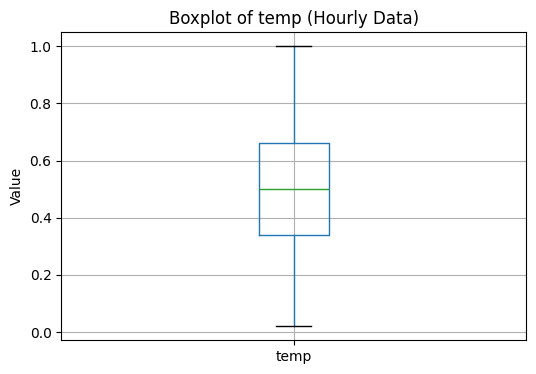

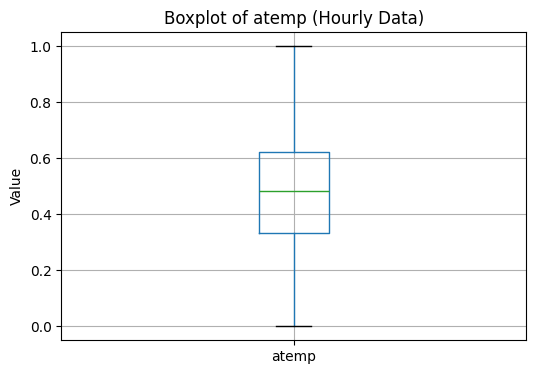

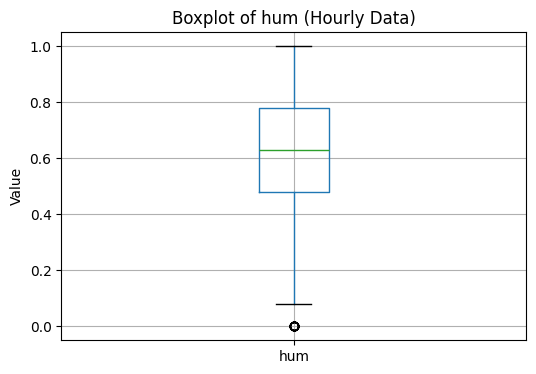

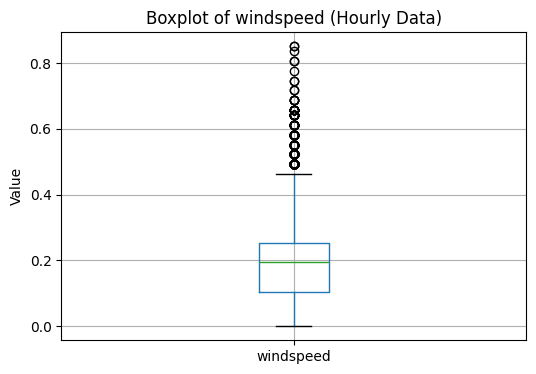

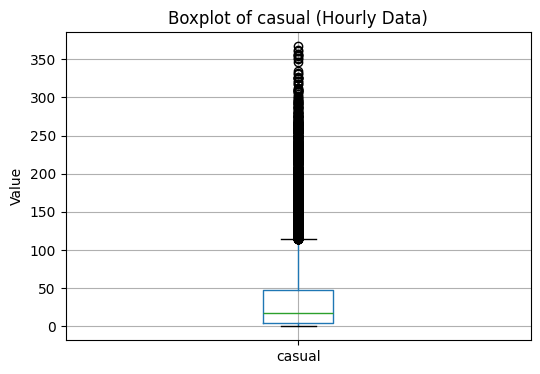

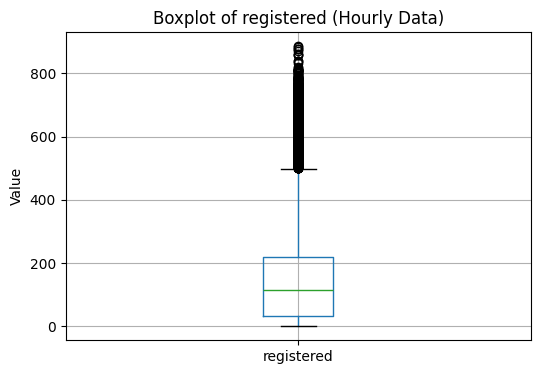

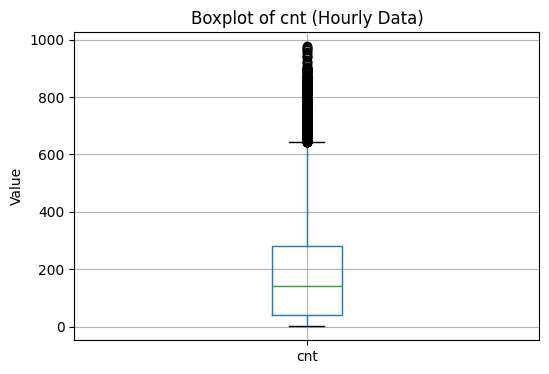

In [22]:
# List of numerical columns for hourly_data (excluding 'instant')
numerical_cols_hourly = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Create boxplots for each numerical column in hourly_data
for col in numerical_cols_hourly:
    plt.figure(figsize=(6, 4))
    hourly_data.boxplot(column=col)
    plt.title(f'Boxplot of {col} (Hourly Data)')
    plt.ylabel('Value')
    plt.show()

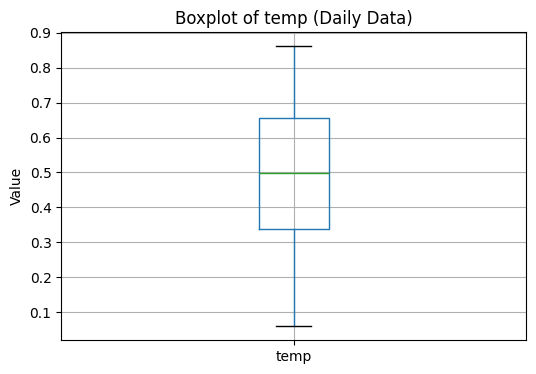

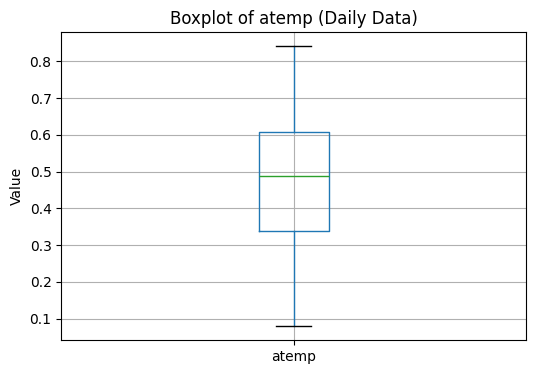

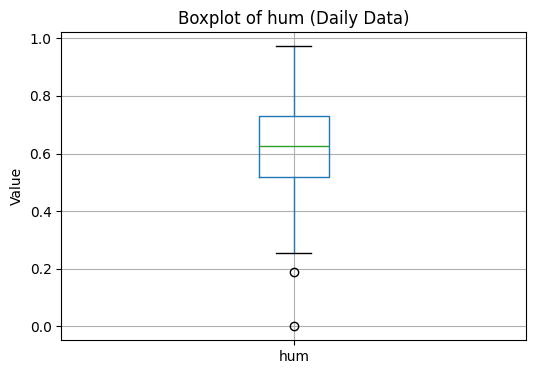

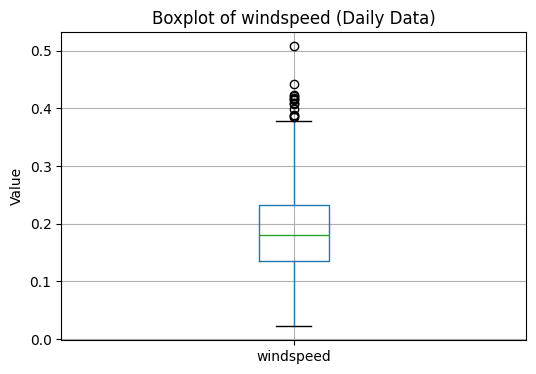

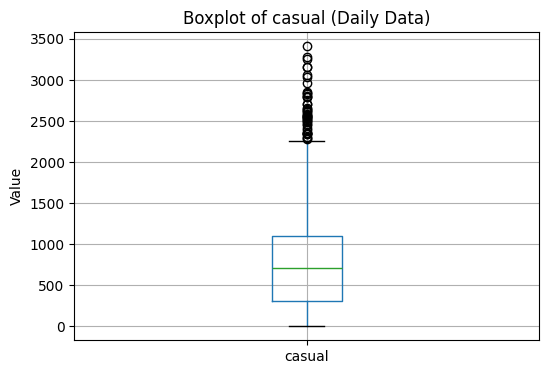

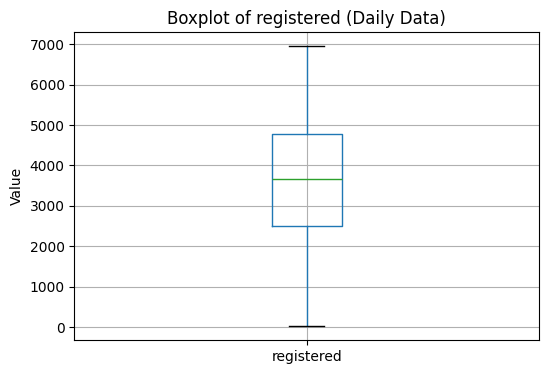

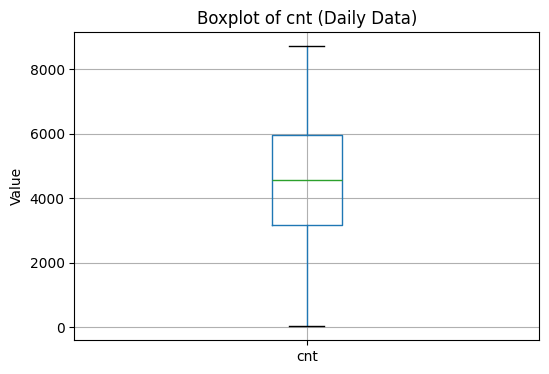

In [23]:
# List of numerical columns for daily_data (excluding 'instant')
numerical_cols_daily = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Create boxplots for each numerical column in daily_data
for col in numerical_cols_daily:
    plt.figure(figsize=(6, 4))
    daily_data.boxplot(column=col) 
    plt.title(f'Boxplot of {col} (Daily Data)')
    plt.ylabel('Value')
    plt.show()

5. Check duplicate rows

In [24]:
print("Duplicated rows in hourly_data:", hourly_data.duplicated().sum())
print("Duplicated rows in daily_data:", daily_data.duplicated().sum())

Duplicated rows in hourly_data: 0
Duplicated rows in daily_data: 0


#### Cleaning Data

1. Create copies to avoid modifying original DataFrames

In [27]:
hourly_data_cleaned = hourly_data.copy()
daily_data_cleaned = daily_data.copy()

2. Outlier handling (Winsorization). Cap and floor at 1st and 99th percentiles.

In [28]:
for col in ['casual', 'registered', 'cnt']:  # Both DataFrames have these columns
    # Hourly data
    lower_limit = hourly_data_cleaned[col].quantile(0.01)
    upper_limit = hourly_data_cleaned[col].quantile(0.99)
    hourly_data_cleaned[col] = hourly_data_cleaned[col].clip(lower=lower_limit, upper=upper_limit)

    # Daily data
    lower_limit = daily_data_cleaned[col].quantile(0.01)
    upper_limit = daily_data_cleaned[col].quantile(0.99)
    daily_data_cleaned[col] = daily_data_cleaned[col].clip(lower=lower_limit, upper=upper_limit)

3. Cleaned data verification

In [29]:
print("\nMissing values in cleaned hourly data:")
print(hourly_data_cleaned.isnull().sum())
print("\nMissing values in cleaned daily data:")
print(daily_data_cleaned.isnull().sum())


Missing values in cleaned hourly data:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day_name      0
year_month    0
dtype: int64

Missing values in cleaned daily data:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day_name      0
year_month    0
dtype: int64


In [30]:
print("\nData types of cleaned hourly data:")
print(hourly_data_cleaned.dtypes)


Data types of cleaned hourly data:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered           float64
cnt                  float64
day_name              object
year_month         period[M]
dtype: object


In [31]:
print("\nData types of cleaned daily data:")
print(daily_data_cleaned.dtypes)


Data types of cleaned daily data:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual               float64
registered           float64
cnt                  float64
day_name              object
year_month         period[M]
dtype: object


4. Cleaned data visualization

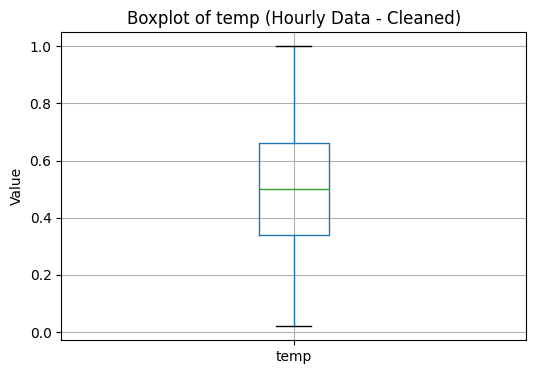

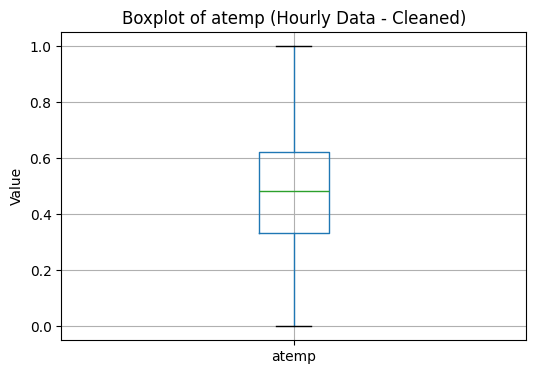

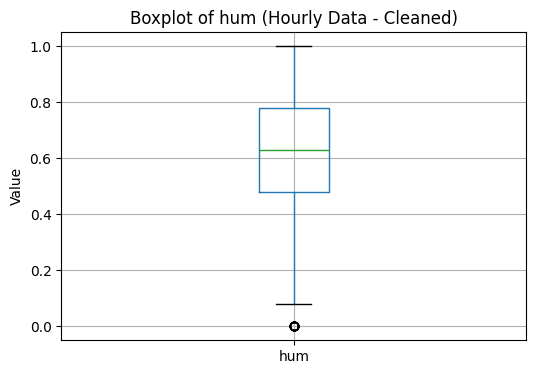

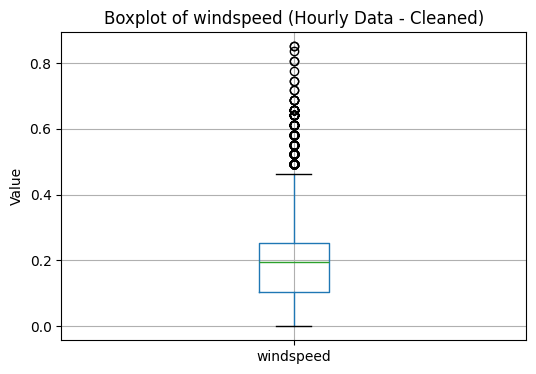

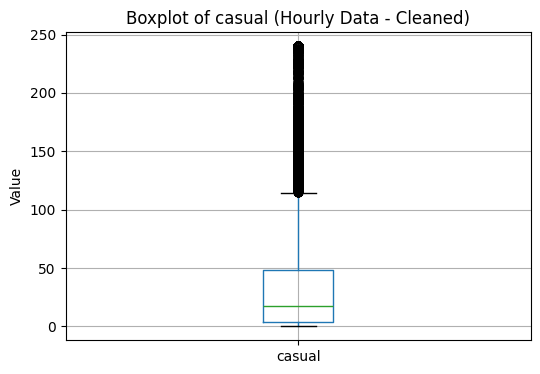

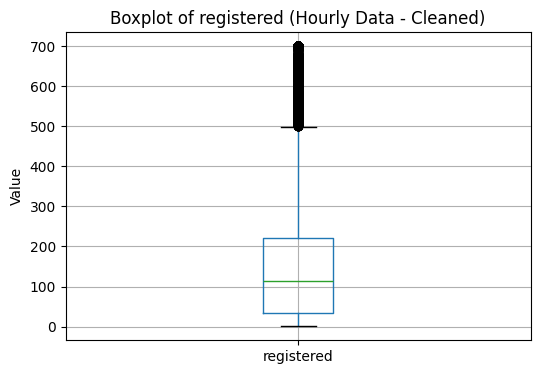

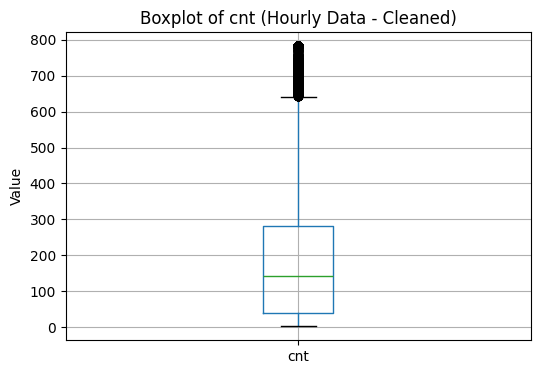

In [32]:
# Boxplots for hourly_data (cleaned)
numerical_cols_hourly = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in numerical_cols_hourly:
    plt.figure(figsize=(6, 4))
    hourly_data_cleaned.boxplot(column=col)
    plt.title(f'Boxplot of {col} (Hourly Data - Cleaned)')
    plt.ylabel('Value')
    plt.show()

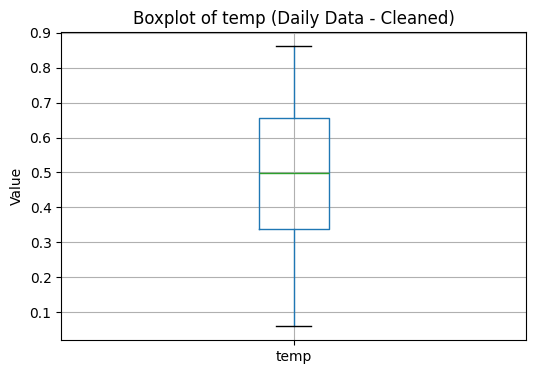

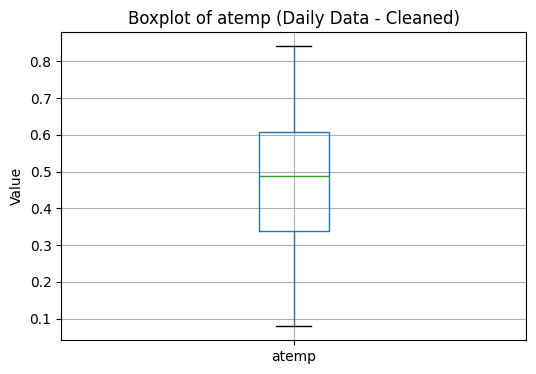

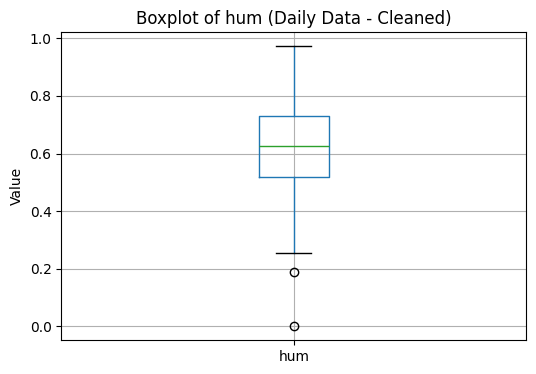

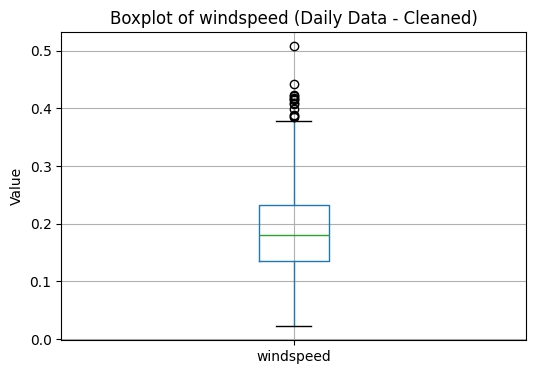

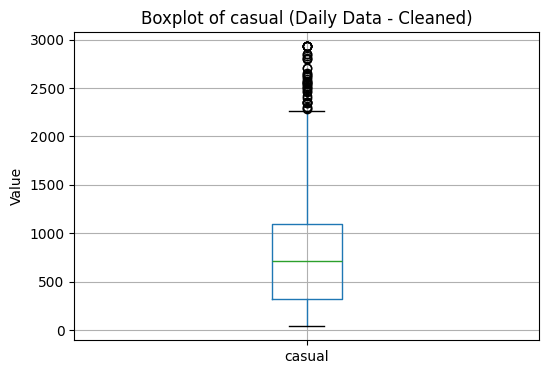

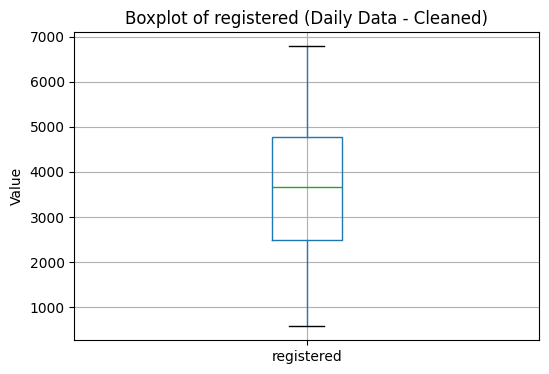

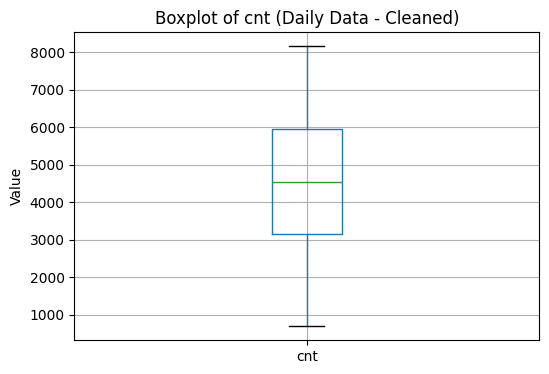

In [33]:
# Boxplots for daily_data (cleaned)
numerical_cols_daily = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in numerical_cols_daily:
    plt.figure(figsize=(6, 4))
    daily_data_cleaned.boxplot(column=col)
    plt.title(f'Boxplot of {col} (Daily Data - Cleaned)')
    plt.ylabel('Value')
    plt.show()

5. Save the cleaned data into a new variable.

In [ ]:
hourly_data_clean = hourly_data_cleaned
daily_data_clean = daily_data_cleaned
print(hourly_data_cleaned.head())
print(daily_data_cleaned.head())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered   cnt  \
0           1  0.24  0.2879  0.81        0.0       3        13.0  16.0   
1           1  0.22  0.2727  0.80        0.0       8        32.0  40.0   
2           1  0.22  0.2727  0.80        0.0       5        27.0  32.0   
3           1  0.24  0.2879  0.75        0.0       3        10.0  13.0   
4           1  0.24  0.2879  0.75        0.0       0         1.0   2.0   

   day_name year_month  
0  Saturday    2011-01  
1  Saturday    2011-01  
2  Saturday    20